In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\ML\sem1\Bigmart price prediction\Train.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.shape

(8523, 12)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [10]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

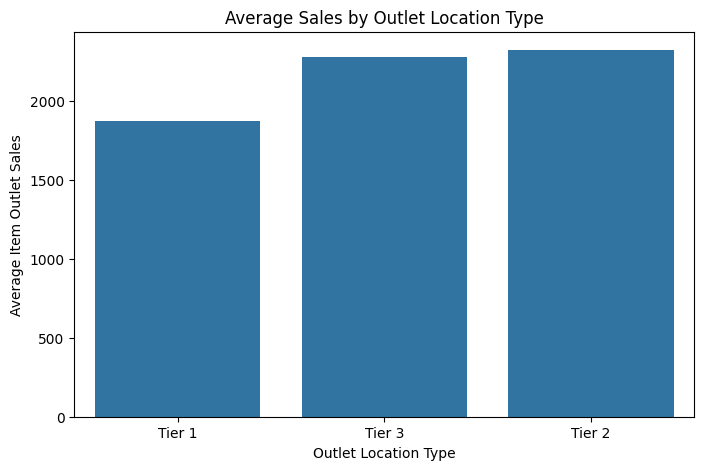

In [20]:
plt.figure(figsize=(8, 5))
avg_sales_by_location = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values()
sns.barplot(x=avg_sales_by_location.index, y=avg_sales_by_location.values)
plt.title('Average Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Item Outlet Sales')
plt.show()

- **Tier 1**: Around 1800 sales – might be due to smaller or less busy areas.
- **Tier 2**: Around 2000 sales – possibly busier locations with more customers.
- **Tier 3**: Highest at 2200 sales – likely due to bigger stores or urban areas.

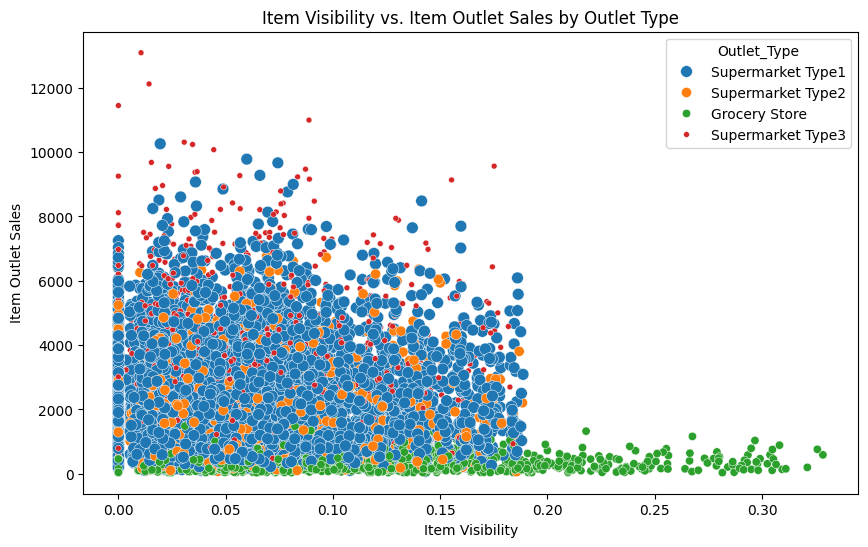

In [13]:
# Scatter plot of Item Visibility vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Outlet_Type', size='Outlet_Type', data=df)
plt.title('Item Visibility vs. Item Outlet Sales by Outlet Type')
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

- **Supermarket Type1 & Type2**: Higher sales (up to 8000-12000) with low visibility (0-0.15) – maybe due to strong brand or location.
- **Supermarket Type3**: High sales (up to 12000) with low to medium visibility – could be due to premium products or marketing.
- **Grocery Store**: Low sales (0-2000) with high visibility (0.15-0.3) – possibly due to smaller size or fewer customers.

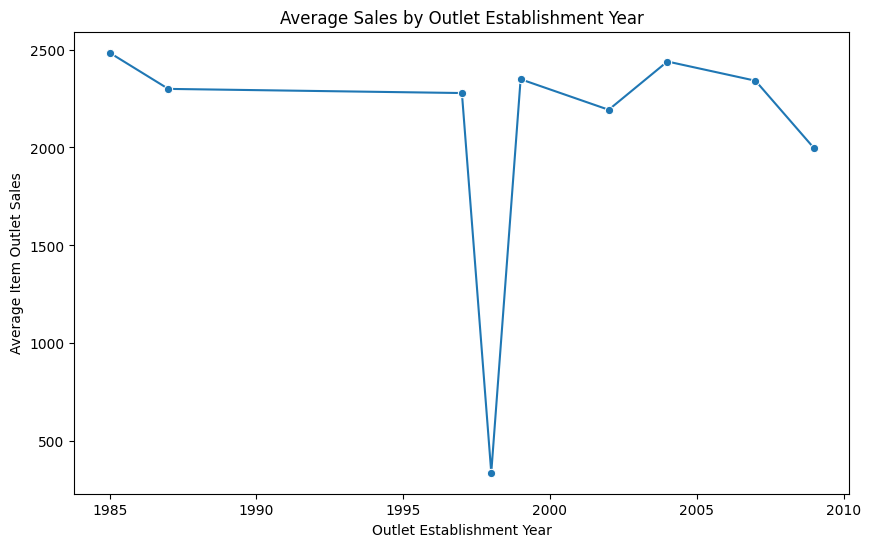

In [15]:
# Line plot for average sales by Outlet Establishment Year
avg_sales_by_year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=avg_sales_by_year, marker='o')
plt.title('Average Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Average Item Outlet Sales')
plt.show()

- Older stores (1985-1999) have higher sales (2000-2500 units).
- A big dip in sales (~500 units) for 1995 stores.
- Sales rise after 2000 (up to ~2500 units by 2004).
- Slight drop after 2005 (~2000 units by 2010).
- Older stores generally perform better, with a 1995 outlier.

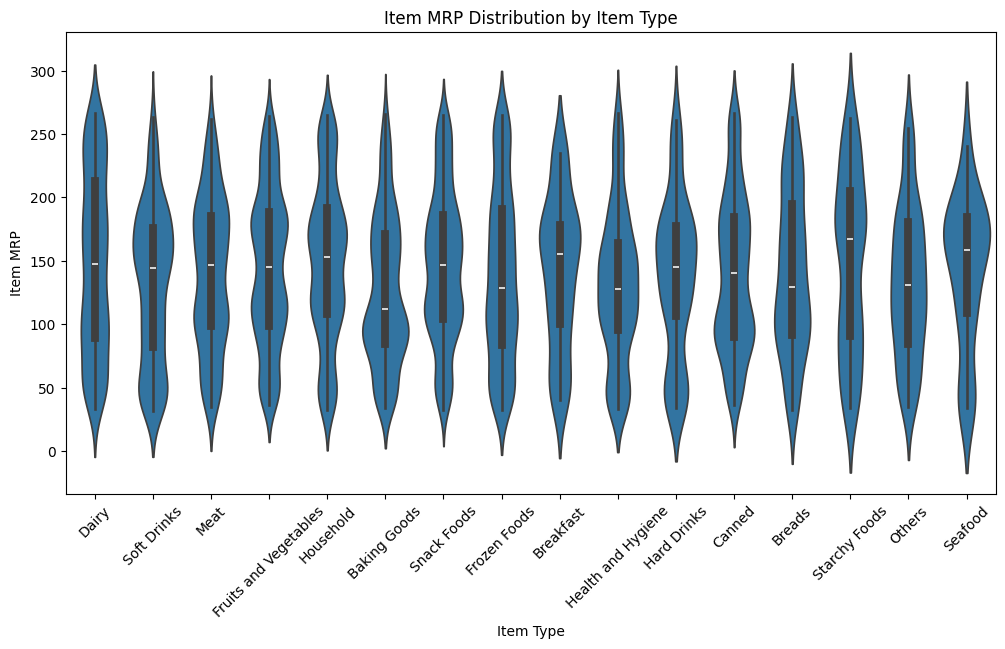

In [16]:
# Violin plot for Item MRP by Item Type
plt.figure(figsize=(12, 6))
sns.violinplot(x='Item_Type', y='Item_MRP', data=df)
plt.title('Item MRP Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item MRP')
plt.xticks(rotation=45)
plt.show()

- **Wide Range**: Seafood, Starchy Foods, and Dairy have the widest MRP ranges (0-300), showing lots of price variety.
- **Narrow Range**: Soft Drinks and Breads have narrower ranges (around 100-200), meaning prices are more similar.
- **High Prices**: Seafood and Starchy Foods often have higher MRPs (up to 300), suggesting premium items.
- **Low Prices**: Soft Drinks and Canned goods tend to have lower MRPs (around 100), likely budget-friendly.
- **Even Spread**: Most item types have a thick middle (100-200), showing most prices cluster here.

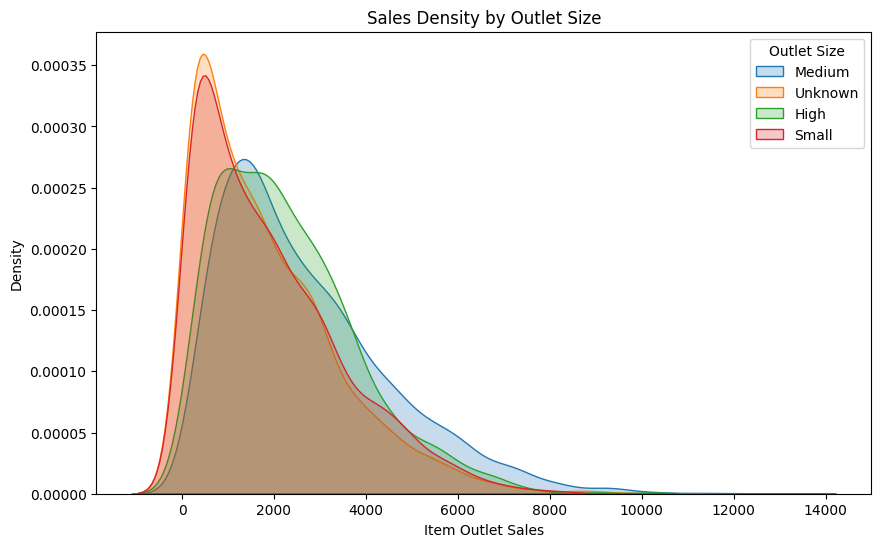

In [18]:
# KDE plot for sales by Outlet Size
plt.figure(figsize=(10, 6))
for size in df['Outlet_Size'].unique():
    sns.kdeplot(data=df[df['Outlet_Size'] == size]['Item_Outlet_Sales'], label=size, fill=True)
plt.title('Sales Density by Outlet Size')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.legend(title='Outlet Size')
plt.show()

- **Wide Range**: Seafood, Starchy Foods, and Dairy have the widest MRP ranges (0-300), showing lots of price variety.
- **Narrow Range**: Soft Drinks and Breads have narrower ranges (around 100-200), meaning prices are more similar.
- **High Prices**: Seafood and Starchy Foods often have higher MRPs (up to 300), suggesting premium items.
- **Low Prices**: Soft Drinks and Canned goods tend to have lower MRPs (around 100), likely budget-friendly.
- **Even Spread**: Most item types have a thick middle (100-200), showing most prices cluster here.

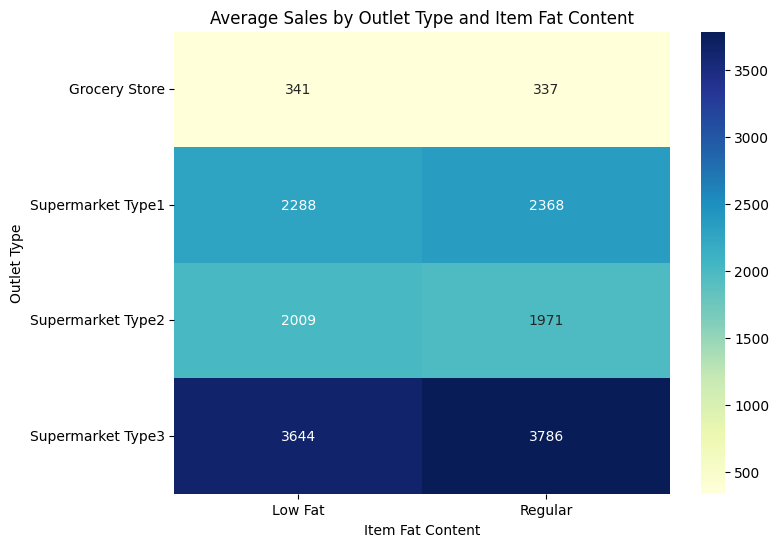

In [19]:
# Pivot table for heatmap
pivot_sales = df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type', columns='Item_Fat_Content', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_sales, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Sales by Outlet Type and Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Outlet Type')
plt.show()

- **Supermarket Type3** has the highest sales (3644 for Low Fat, 3786 for Regular) – likely due to bigger stores or better locations.
- **Supermarket Type2** has moderate sales (2009 for Low Fat, 1971 for Regular) – maybe due to mid-sized stores.
- **Supermarket Type1** has lower sales (2288 for Low Fat, 2368 for Regular) – possibly smaller or less busy stores.
- **Grocery Store** has the lowest sales (341 for Low Fat, 337 for Regular) – probably due to smaller size or fewer customers.
- **Regular Items Sell More**: Regular fat items generally have slightly higher sales than Low Fat across all store types.

## Overall Takeaways
- Store Type and Location Matter: Supermarket Type3 and Tier 3 locations drive the highest sales, suggesting larger or urban stores perform best.
- Pricing and Product Impact: Higher MRPs (e.g., Seafood) and Regular fat items correlate with better sales, indicating consumer preference for premium or traditional options.
- Visibility’s Limited Role: High sales occur even with low visibility, pointing to factors like location or store type being more influential than product visibility.
- Time Factor: Older stores generally outperform newer ones, but newer stores post-2000 show growth potential.
- These insights can guide business decisions like focusing on Tier 3 locations, promoting high-MRP items, and leveraging established stores while nurturing newer ones. Let me know if you’d like deeper analysis or next steps!

In [ ]:
class 